## What files do I need?
You'll need train.csv, test.csv and sample_submission.csv.

## What should I expect the data format to be?
- Each sample in the train and test set has the following information:
- The text of a tweet
- A keyword from that tweet (although this may be blank!)
- The location the tweet was sent from (may also be blank)

## What am I predicting?
You are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.

## Files
- train.csv - the training set
- test.csv - the test set
- sample_submission.csv - a sample submission file in the correct format

## Columns
- id - a unique identifier for each tweet
- text - the text of the tweet
- location - the location the tweet was sent from (may be blank)
- keyword - a particular keyword from the tweet (may be blank)
- target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

# importing library

In [93]:
import pandas as pd
import numpy as np
import re

# reading dataset

In [77]:
df_train = pd.read_csv(r'C:\Users\home\WorkSpace\kaggle\Real_or_Not\train.csv', dtype={'id': np.int16, 'target': np.int8})
df_test = pd.read_csv(r'C:\Users\home\WorkSpace\kaggle\Real_or_Not\test.csv', dtype={'id': np.int16})
df_sub = pd.read_csv(r'C:\Users\home\WorkSpace\kaggle\Real_or_Not\sample_submission.csv', dtype={'id': np.int16})

# data exploring&cleaning

In [78]:
df_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [79]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int16 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int8  
dtypes: int16(1), int8(1), object(3)
memory usage: 200.9+ KB


In [80]:
df_train.shape

(7613, 5)

In [81]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int16 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int16(1), object(3)
memory usage: 83.0+ KB


In [82]:
df_test.shape

(3263, 4)

In [83]:
target_df_train = df_train.groupby('target').target.count()

In [84]:
target_df_train


target
0    4342
1    3271
Name: target, dtype: int64

In [85]:
label = ['disaster', 'non_disaster']

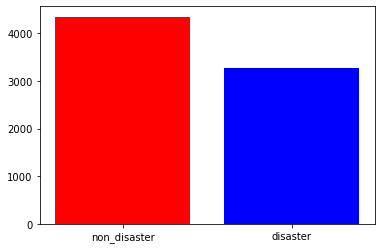

In [86]:
plt.bar(label[1],target_df_train[0], color = 'r')
plt.bar(label[0],target_df_train[1], color = 'b')
plt.show()

이 예제 를 풀려면 텍스트에 대한 분류와 binary classification이 필요할 것 같다. 이 부분에서 공부를 해야할 것 같다. 
텍스트를 통한 KEYWORD분류도 가능할 것 같다. 

# Text processing

In [88]:
def clean_data(name):
    # Replace email addresses with 'email'
    processed = name.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                     'emailaddress')

    # Replace URLs with 'webaddress'
    processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                      'webaddress')

    # Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
    processed = processed.str.replace(r'£|\$', 'moneysymb')

    # Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    processed = processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                      'phonenumbr')

    # Replace numbers with 'numbr'
    processed = processed.str.replace(r'\d+(\.\d+)?', 'numbr')

    # Remove punctuation
    processed = processed.str.replace(r'[^\w\d\s]', ' ')

    # Replace whitespace between terms with a single space
    processed = processed.str.replace(r'\s+', ' ')

    # Remove leading and trailing whitespace
    processed = processed.str.replace(r'^\s+|\s+?$', '')

    # change words to lower case - Hello, HELLO, hello are all the same word
    processed = processed.str.lower()
    
    return processed

In [89]:
clean_train = clean_data(df_train["text"])
clean_test = clean_data(df_test["text"])

In [90]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

clean_train = clean_train.apply(lambda x:" ".join(term for term in x.split() if term not in stop_words))

clean_test = clean_test.apply(lambda x:" ".join(term for term in x.split() if term not in stop_words))

In [92]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

clean_train = clean_train.apply(lambda x:" ".join(term for term in x.split() if term not in stop_words))

clean_test = clean_test.apply(lambda x:" ".join(term for term in x.split() if term not in stop_words))
print([s.stem(w) for w in words])

TypeError: argument of type 'PorterStemmer' is not iterable